# Probability: The Game-Show Problem

The Game-Show Problem, or Monty Hall Problem according to <a href="https://en.wikipedia.org/wiki/Monty_Hall_problem"> Wikipedia</a>, is brought up frequently. Whether it's an interesting puzzle presented by a friend as an anecdote, a scene in a movie, or in an introduction to probability textbook.

The situation is as follows:
1. You choose one of three doors. One has a desired prize, like a new car behind it and two have a goat. If your door has the desired prize behind it, you keep the prize (unclear on who keeps the goat).
2. After choosing a door, the game show host <i>always opens one of the remaining two doors with a goat behind it</i>. That is, he always opens a door that has a goat behind it and is not the door you selected.
3. The host then presents you with two options, to keep the door you selected or to switch to the last remaining unopened door.

The question becomes, <b>which option maximizes your chance of winning the car?</b>

Professor Morin mentions the problem in his book <a href="http://www.people.fas.harvard.edu/~djmorin/book.html">Probability For the Enthusiastic Beginner</a> and provides several explanations. Having had experience with this scenario, the part I found most intriguing is his advice for convincing yourself of the answer:

>"It doesn't make any sense to argue about this problem for more than, say, 20 minutes, because at that point everyone should stop and just play the game!"

He is absolutely right and below is my little walk through simulating the Game-Show Problem. This post will show you that by always switching your choice of doors, the chance of winning the desired prize is 2/3.

### Import Libraries

Lets import a few libraries.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Door Prizes

Create a data frame called <b>door_prizes</b> where each value for <b>door_prizes</b> is either a "P" to symbolize the desired prize or "G" for goat. Two "doors" will have a goat, or "G", behind it and one "door" will have a "P" behind it to represent the prize.

Now use the <b>sample</b> function in the <b>Pandas</b> library to randomly sort the three doors. We will need to reset the index because <b>sample</b> would return the original index values otherwise.

In [2]:
door_prizes = pd.DataFrame(data=['P','G','G'], columns=['Doors'])
door_prizes = door_prizes.sample(n=3).reset_index(drop=True)
door_prizes

,Doors
0,G
1,P
2,G


## Play the Game

With the doors randomized, let's play the game!

### 1. Choose a Door

First step in the game is for the player to choose a door. I will use the <b>randint</b> from the <b>Numpy</b> library to select an integer between 0 and 2 (including 0 and 2).

In [3]:
door_choice = np.random.randint(low=0,high=3)
door_choice

0

### 2. Host Reveals a Goat

The second step is for the host select one of the two remaining doors and reveal a goat, thereby removing that door as a choice and providing us with valuable information about where the desired prize is not.

I will simulate this by finding the first instance of a goat and deleting it from the data frame <b>door_prizes</b>. I will use a for-loop to loop over the rows in <b>door_prizes</b>. If a row has a goat and is not the door I selected, then I will delete the row from the data frame. To make sure I don't delete any other rows that may satisfy the if-statement, I use the <b>break</b> statement to break the for-loop.

In [4]:
for index, choice in door_prizes.iterrows():
    if choice[0] == 'G' and index != door_choice:
        door_prizes = door_prizes.drop([index])
        break
print(door_prizes)

  Doors
0     G
1     P


### 3. Optimizing Strategy

The third step of the game is to choose whether or not to switch doors. I said in the beginning that I am doing this with the strategy that I will switch doors when the time comes. By doing so, I will show that I win the game with a probably of two-thirds.

To simulate switching doors, I am just going to delete the door I selected, thereby leaving me with only one door.

In [5]:
door_prizes = door_prizes.drop([door_choice])
door_prizes

,Doors
1,P


### 4. Check Behind the Door

If the prize is behind the final door, then print "You Win!", otherwise print "You Lose."

In [6]:
for prize in door_prizes['Doors']:
    if prize == "P":
        print("You Win!")
    else:
        print("You Lose.")

You Win!


## Multi-Game Simulation

Now to show that the proportion of wins is two-thirds, we need to play this game may more times. Let's combine all of the steps above and run through the game 10,000 times. I will create two lists <b>win</b> and <b>runs</b> to capture the data we need to calculate the ratio of wins to total simulated games.

### Run Simulation

In [7]:
#Create the door prizes
door_prizes = pd.DataFrame(data=['P','G','G'], columns=['Doors'])

#Create the list of winning and total games. Use list, not counters, so that we have a running count.
win = []
runs = []

i = 1
while i <= 10000:
    #Randomize the doors
    door_prizes_rand = door_prizes.sample(n=3).reset_index(drop=True)
    
    #1. Choose a door
    door_choice = np.random.randint(low=0,high=3)
    
    #2. Show me a goat!
    counter = 0
    for index, choice in door_prizes_rand.iterrows():
        if choice[0] == 'G' and index != door_choice and counter == 0:
            counter = 1
            door_prizes_rand = door_prizes_rand.drop([index])
            
    #3. Now employ the strategy where we switch doors, giving up our initial choice.
    door_prizes_rand = door_prizes_rand.drop([door_choice])
    
    #4. Check what is behind the door, goat or prize.
    for prize in door_prizes_rand['Doors']:
        if prize == "P":
            win.append(1)
        else:
            win.append(0)
        
        runs.append(i)
        i += 1

### Calculate Results

Let's add the lists <b>runs</b> and <b>wins</b> to a data frame called <b>sim_data</b>. In order to see the progression of wins over time, calculate the cumulative sum of wins using the <b>cumsum</b> function and store it in <b>win_cumulative</b>. Then take the ratio of <b>win_cumulative</b> and <b>runs</b> and store it in <b>win_proportion</b>. Also, for visual effects, it will be helpful to store the value of 2/3.

In [8]:
sim_data = pd.DataFrame(data={'win':win,
                              'runs':runs})

sim_data['win_cumulative'] = sim_data['win'].cumsum()
sim_data['win_proportion'] = sim_data['win_cumulative'] / sim_data['runs']
sim_data['twothirds'] = 2/3

sim_data.head()

,runs,win,win_cumulative,win_proportion,twothirds
0,1,0,0,0.000000,0.666667
1,2,1,1,0.500000,0.666667
2,3,1,2,0.666667,0.666667
3,4,1,3,0.750000,0.666667
4,5,1,4,0.800000,0.666667


### Plot Results

Plot using the <b>plot.line</b> module that is available with <b>Pandas</b>. We can see that the proportions of wins becomes approaches 2/3.

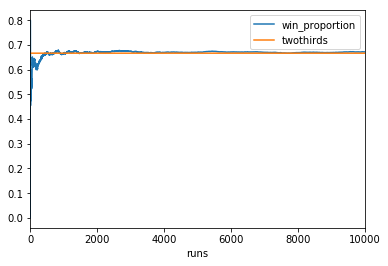

In [12]:
sim_data.plot.line(x='runs', y=['win_proportion','twothirds'])
plt.show()